# Comportamiento de las series

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [75]:
def serie_divergente(z: float, n: int,p: float):
    res = 0
    for i in np.arange(1,n+1,1):
        res = res + z**i/(i**p)
    return res

In [66]:
# data
x_data = 1/np.arange(1,1001,1)
y_data_1 = []
for nv in np.arange(1,1001,1):
    y_data_1.append(1/serie_divergente(1,nv,1.2))
y_data_2 = []
for nv in np.arange(1,1001,1):
    y_data_2.append(1/serie_divergente(1,nv,1.1))

In [55]:
data_path = Path("../../../data/").resolve()
file = 'all_inv_Tc.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [56]:
df_all_tc

,1/nv,P1.0,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P1.9,P2.0
0,0.500000,0.662721,0.680297,0.700150,0.717028,0.734866,0.751727,0.770168,0.786703,0.803441,0.820681,0.835529
1,0.333333,0.505386,0.528284,0.546419,0.574539,0.597153,0.619581,0.642793,0.665299,0.687169,0.709461,0.732735
2,0.250000,0.425707,0.450768,0.472832,0.501265,0.528284,0.555318,0.580268,0.606328,0.631346,0.656782,0.680642
3,0.200000,0.375812,0.402337,0.429970,0.456688,0.485307,0.512765,0.541671,0.569954,0.598822,0.626314,0.653388
4,0.166667,0.341083,0.368523,0.396765,0.424721,0.455167,0.486573,0.515543,0.545704,0.574864,0.605612,0.634517
5,0.142857,0.315105,0.343136,0.372431,0.401683,0.432891,0.463020,0.495621,0.527741,0.560164,0.590963,0.622788
6,0.125000,0.294999,0.323355,0.353053,0.383836,0.415381,0.447872,0.480460,0.513612,0.546888,0.579394,0.611867
7,0.111111,0.278617,0.307334,0.337482,0.368796,0.401333,0.434561,0.468367,0.502578,0.536848,0.570911,0.604637
8,0.100000,0.265052,0.293982,0.324509,0.356434,0.389497,0.423546,0.458147,0.493491,0.528531,0.563834,0.598451
9,0.090909,0.253624,0.282715,0.313452,0.345748,0.379390,0.414121,0.449594,0.485589,0.521795,0.558070,0.593677


In [58]:
x_exp_data = df_all_tc['1/nv']
y_exp_data = df_all_tc['P1.0']

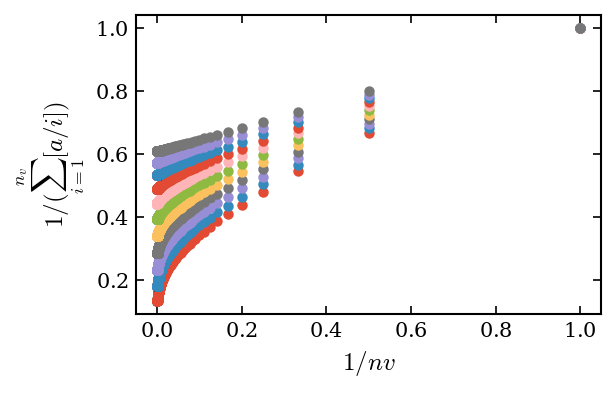

In [68]:
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

for curve in np.arange(1,2.1,0.1):
    # data
    x_data = 1/np.arange(1,1001,1)
    y_data = []
    for nv in np.arange(1,1001,1):
        y_data.append(1/serie_divergente(1,nv,curve))

    # ax.plot(x_exp_data, y_exp_data, marker="x", lw=0)
    ax.plot(x_data, y_data, marker="o", lw=0)
    # ax.plot(x_data, y_data_2, marker="o", lw=0,)

ax.set_xlabel(r"$1/nv$")
ax.set_ylabel(r"$1/(\sum_{i=1}^{n_v}[a/i])$")

pyplot.draw()

pyplot.show()

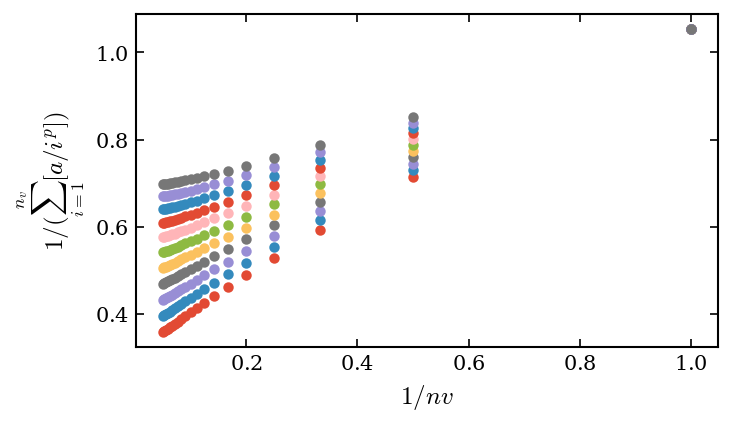

In [76]:
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(5, 10), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

for curve in np.arange(1,2.1,0.1):
    # data
    x_data = 1/np.arange(1,21,1)
    y_data = []
    for nv in np.arange(1,21,1):
        y_data.append(1/serie_divergente(0.95,nv,curve))

    # ax.plot(x_exp_data, y_exp_data, marker="x", lw=0)
    ax.plot(x_data, y_data, marker="o", lw=0, label='')
    # ax.plot(x_data, y_data_2, marker="o", lw=0,)

ax.set_xlabel(r"$1/nv$")
ax.set_ylabel(r"$1/(\sum_{i=1}^{n_v}[a/i^p])$")

pyplot.draw()

pyplot.show()

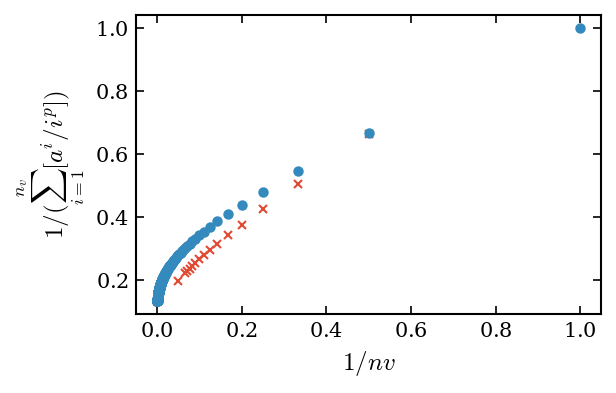

In [79]:
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# data
x_data = 1/np.arange(1,1001,1)
y_data = []
for nv in np.arange(1,1001,1):
    y_data.append(1/serie_divergente(1,nv,1))

ax.plot(x_exp_data, y_exp_data, marker="x", lw=0)
ax.plot(x_data, y_data, marker="o", lw=0)
# ax.plot(x_data, y_data_2, marker="o", lw=0,)

ax.set_xlabel(r"$1/nv$")
ax.set_ylabel(r"$1/(\sum_{i=1}^{n_v}[a^i/i^p])$")

pyplot.draw()

pyplot.show()

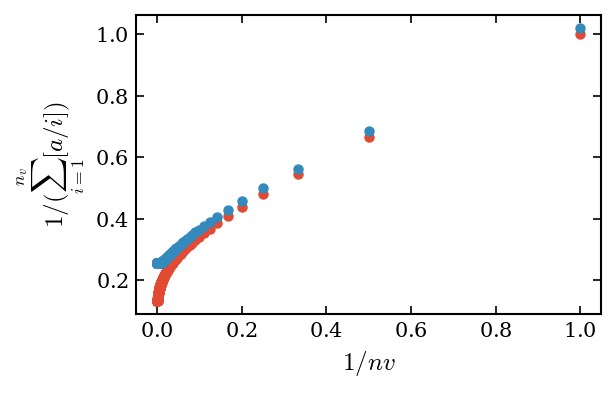

In [78]:
# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# data
x_data = 1/np.arange(1,1001,1)
y_data_1 = []
for nv in np.arange(1,1001,1):
    y_data_1.append(1/serie_divergente(1,nv,1))
y_data_2 = []
for nv in np.arange(1,1001,1):
    y_data_2.append(1/serie_divergente(0.98,nv,1))

    
# ax.plot(x_exp_data, y_exp_data, marker="x", lw=0)
ax.plot(x_data, y_data_1, marker="o", lw=0)
ax.plot(x_data, y_data_2, marker="o", lw=0,)

ax.set_xlabel(r"$1/nv$")
ax.set_ylabel(r"$1/(\sum_{i=1}^{n_v}[a/i])$")

pyplot.draw()

pyplot.show()